# Project 1: Seattle Airbnb Data

In [1]:
# Configuration
%run ../src/configuration.py

In [2]:
# Modules
import os
import pandas
import seaborn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from src.visualization import barplot, lineplot

In [3]:
# Settings
pandas.set_option('display.max_columns', None)

In [4]:
# Parameters
folder = f'{os.getcwd()}/data'

## Airbnb Seattle Open Data

https://www.kaggle.com/datasets/airbnb/seattle

### Listings

In [5]:
# Listings
listings = pandas.read_csv(f'{folder}/listings.csv')

# Display
display(listings.head())

# Shape
print(listings.shape)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

(3818, 92)


In [ ]:
from matplotlib import pyplot
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from typing import Tuple

def barplot(
    series: pandas.Series,
    log: bool = True,
    max_features: int = 50,
    figsize: Tuple = (18, 7.5),
) -> Tuple[Figure, Axes]:
    """
    Plotting barplot.

    Args:
        series: Data to plot.
        log: If plotting addition barplot on log scale.
        max_features: Maximum number of labels.
        figsize: Size of figure.

    Returns:
        Figure and axes.
    """
    # Color
    color = seaborn.cubehelix_palette(
        start=0.2,
        rot=-0.3,
        as_cmap=True,
    ).colors[int(0.5*256)]

    # Labels
    if len(series) > max_features:
        series = series[:max_features]

    # Figure and axes
    figure, axes = pyplot.subplots(2, 1, figsize=figsize)

    # Barplot
    if len(series) > 0:
        axes[0].bar(series.index, series.values, color=color)
    axes[0].set_ylabel('COUNT')
    axes[0].set_xticklabels([])

    # Log barplot
    if len(series) > 0:
        axes[1].bar(series.index, series.values, log=True, color=color)
    axes[1].set_ylabel('log(COUNT)')
    axes[1].tick_params('x', labelrotation=90)
    return figure, axes

C:\Users\M85256\AppData\Local\Temp\ipykernel_51468\182761185.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim(0, listings.shape[0])


Text(0.5, 0.98, 'Missing values')

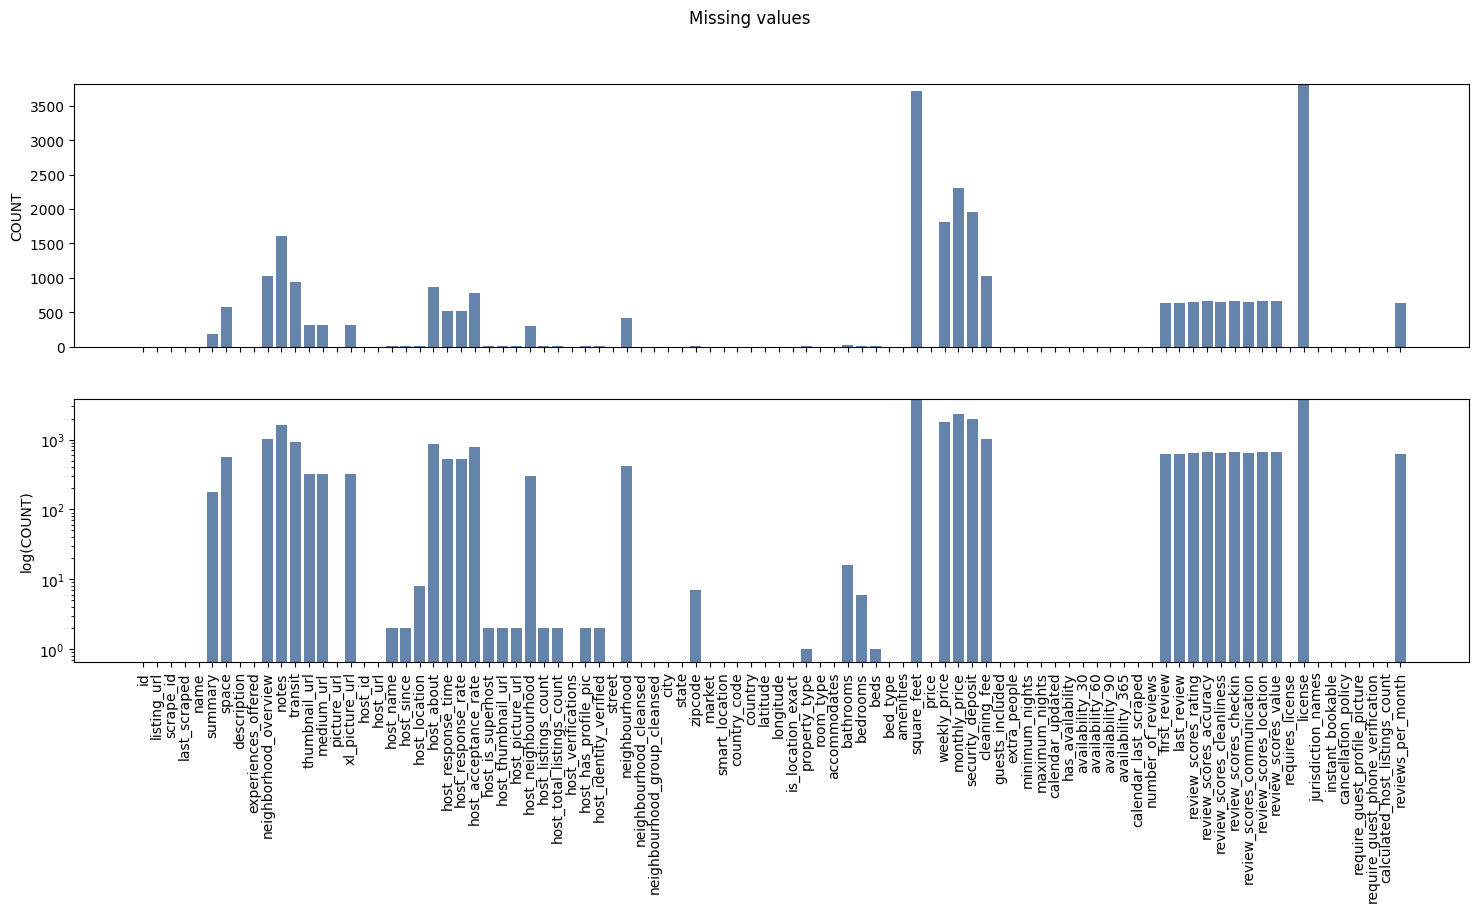

In [6]:
# Missing values
missing_values = listings.isnull().sum()

# Barplot
figure, axes = barplot(missing_values, listings.shape[1])
for axis in axes:
    axis.set_ylim(0, listings.shape[0])
figure.suptitle('Missing values')

C:\Users\M85256\AppData\Local\Temp\ipykernel_51468\4180163039.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axis.set_ylim(0, listings.shape[0])


Text(0.5, 0.98, 'Unique values')

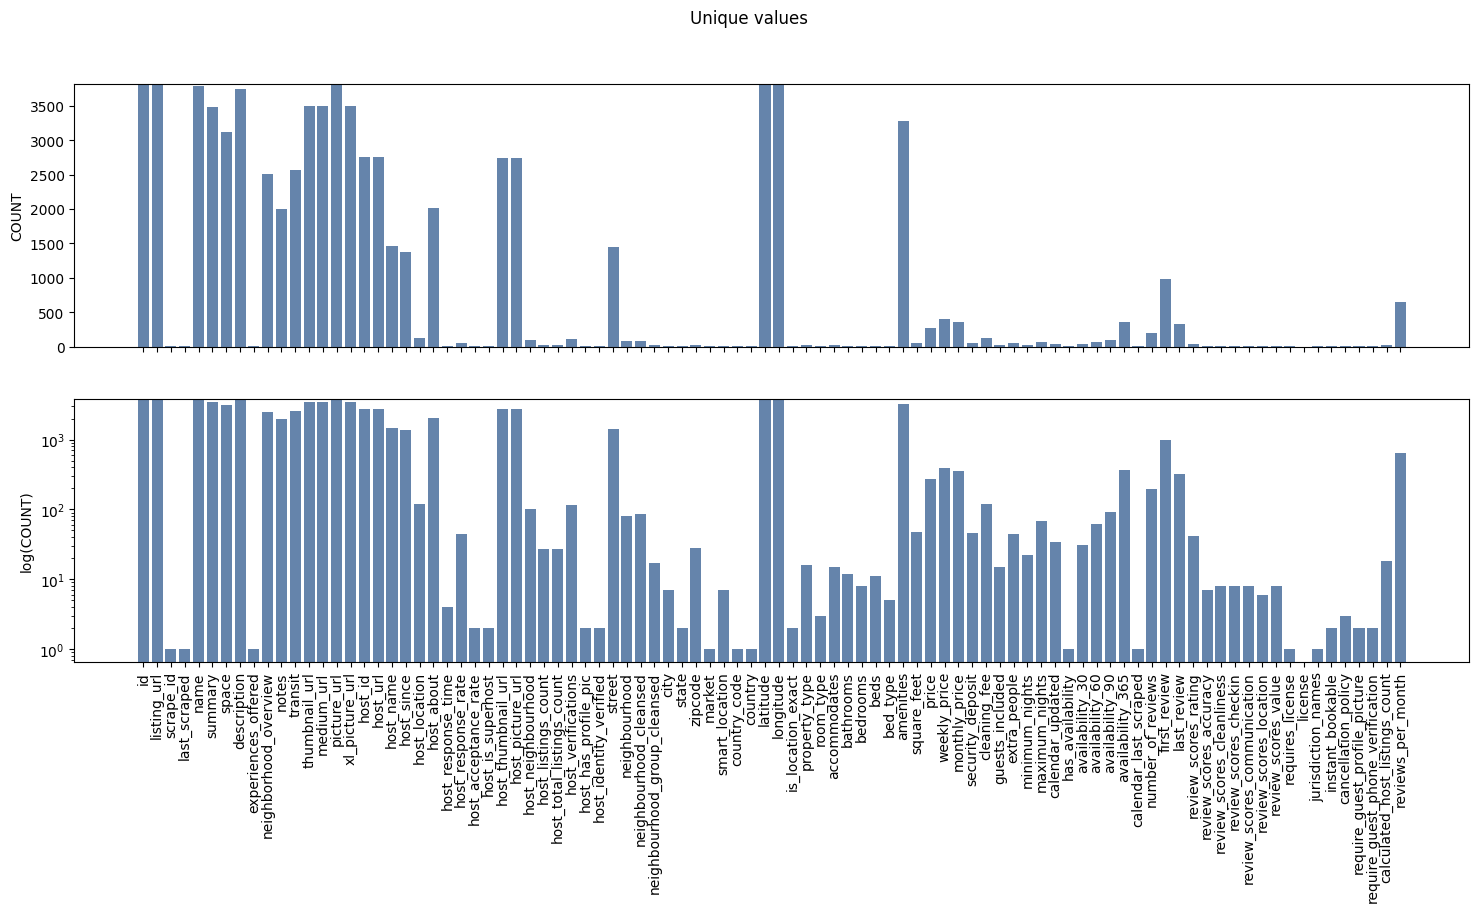

In [7]:
# Unique values
unique_values = listings.nunique()

# Barplot
figure, axes = barplot(unique_values, listings.shape[1])
for axis in axes:
    axis.set_ylim(0, listings.shape[0])
figure.suptitle('Unique values')

### Cleaning data

In [ ]:
def clean_listings(df: pandas.DataFrame) -> pandas.DataFrame:
    """
    Cleaning listings data.

    Args:
        df: Listings data.

    Returns:
        Listings cleaned.
    """
    # Parameters
    index = [
        'id',
    ]
    numcols = [
        'host_response_rate',
        'host_acceptance_rate',
        'host_listings_count',
        'accommodates',
        'bathrooms',
        'bedrooms',
        'beds',
        'price',
        'security_deposit',
        'cleaning_fee',
        'guests_included',
        'extra_people',
        'number_of_reviews',
        'review_scores_rating',
        'review_scores_accuracy',
        'review_scores_cleanliness',
        'review_scores_checkin',
        'review_scores_communication',
        'review_scores_location',
        'review_scores_value',
    ]
    boolcols = [
        'host_is_superhost',
        'host_identity_verified',
    ]
    catcols = [
        'host_response_time',
        'neighbourhood',
        'property_type',
        'room_type',
        'bed_type',
        'cancellation_policy',
    ]
    # Setting index
    df = df.set_index(index)

    # Dropping columns
    df = df.drop(columns=[col for col in df.columns if col not in numcols + catcols + boolcols])

    # Converting datatypes
    for col in numcols:
        if col in df.select_dtypes(object):
            df[col] = df[col].astype(str).str.replace('[%$,. ]', '', regex=True).astype(float)
        elif col in df.select_dtypes(int):
            df[col] = df[col].astype(float)
    for col in boolcols:
         df[col] = df[col].astype(str).replace('t', '1').replace('f', '0').astype(float)

    return df

In [ ]:
# Processing listings
listings = clean_listings(listings)

# Display
display(listings.head())

# Shape
print(listings.shape)

### Calendar

In [ ]:
# Calendar
calendar = CSV(f'{folder}/calendar.csv').load()

# Display
display(calendar.head())

# Shape
print(calendar.shape)

In [ ]:
# Missing values
missing_values = calendar.isnull().sum()

# Barplot
figure, axes = barplot(missing_values, calendar.shape[1])
for axis in axes:
    axis.set_ylim(0, calendar.shape[0])
figure.suptitle('Missing values')

In [ ]:
# Unique values
unique_values = calendar.nunique()

# Barplot
figure, axes = barplot(unique_values, calendar.shape[1])
for axis in axes:
    axis.set_ylim(0, calendar.shape[0])
figure.suptitle('Unique values')

### Cleaning data

In [ ]:
def clean_calendar(df: pandas.DataFrame) -> pandas.DataFrame:
    """
    Cleaning calendar data.

    Args:
        df: Calendar data.

    Returns:
        Calendar cleaned.
    """
    # Parameters
    floatcols = [
        'price',
    ]
    boolcols = [
        'available',
    ]
    datecols = [
        'date',
    ]

    # Converting datatypes
    for col in floatcols:
        df[col] = df[col].astype(str).str.replace('[%$,. ]', '', regex=True).astype(float)
    for col in boolcols:
        df[col] = df[col].astype(str).replace('t', '1').replace('f', '0').astype(float)
    for col in datecols:
        df[col] = pandas.to_datetime(df[col])
    return df

In [ ]:
# Processing calendar
calendar = clean_calendar(calendar)

# Display
display(calendar.head())

# Shape
print(calendar.shape)

### Reviews

In [ ]:
# Reviews
reviews = CSV(f'{folder}/reviews.csv').load()

# Display
display(reviews.head())

# Shape
print(reviews.shape)

In [ ]:
# Missing values
missing_values = reviews.isnull().sum()

# Barplot
figure, axes = barplot(missing_values, reviews.shape[1])
for axis in axes:
    axis.set_ylim(0, reviews.shape[0])
figure.suptitle('Missing values')

In [ ]:
# Unique values
unique_values = reviews.nunique()

# Barplot
figure, axes = barplot(unique_values, max_features=reviews.shape[1])
for axis in axes:
    axis.set_ylim(0, reviews.shape[0])
figure.suptitle('Unique values')

### Cleaning data

In [ ]:
def clean_reviews(df: pandas.DataFrame) -> pandas.DataFrame:
    """
    Cleaning reviews data.

    Args:
        df: Reviews data.

    Returns:
        Reviews cleaned.
    """
    # Parameters
    index = [
        'id',
    ]
    datecols = [
        'date',
    ]

    # Setting index
    df = df.set_index(index)

    # Converting datatypes
    for col in datecols:
        df[col] = pandas.to_datetime(df[col])
    return df


In [ ]:
# Processing reviews
df = clean_reviews(reviews)

# Display
display(df.head())

# Shape
print(df.shape)

## Questions

1. Which are the most popular areas?
2. When is the most expensive time to visit?
3. What features affect the price the most?

In [ ]:
# Data
data = pandas.merge(
    left=calendar[calendar.date.dt.year == 2016],
    right=listings['neighbourhood'],
    how='inner',
    left_on='listing_id',
    right_on='id',
).sort_values('date')

# Display
display(data)

### Bookings

In [ ]:
# Bookings
bookings = data[data['available'] == 0.0].groupby('date')['listing_id'].nunique().reset_index().rename(columns={'listing_id': 'bookings'})

# Lineplot
figure, axes = lineplot(bookings, 'date', 'bookings')
figure.suptitle('Number Of Bookings In Seattle During 2016')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Bookings')

#### Bookings per neighbourhood

In [ ]:
# Bookings per neighbourhood
bookings_neighbourhood = data[data['available'] == 0.0].groupby(['neighbourhood'])['listing_id'].nunique().reset_index().rename(columns={'listing_id': 'bookings'})

# Top neighbourhoods
top_neighbourhoods = bookings_neighbourhood.sort_values('bookings', ascending=False).reset_index(drop=True).iloc[:5]

# Display
display(top_neighbourhoods)

In [ ]:
# Top bookings per neighbourhood
bookings_neighbourhood_top = data[data['available'] == 0.0].groupby(['date', 'neighbourhood'])['listing_id'].nunique().reset_index().rename(columns={'listing_id': 'bookings'})
bookings_neighbourhood_top = bookings_neighbourhood_top[bookings_neighbourhood_top['neighbourhood'].isin(top_neighbourhoods['neighbourhood'])]

# Lineplot
figure, axes = lineplot(bookings_neighbourhood_top, 'date', 'bookings', 'neighbourhood')
figure.suptitle('Number Of Bookings For The Top 5 Neighbourhoods In Seattle During 2016')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Bookings')

### Average price

In [ ]:
# Average price
price = data.groupby('date')['price'].mean().reset_index()

# Lineplot
figure, axes = lineplot(price, 'date', 'price')
figure.suptitle('Average Price In Seattle During 2016')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')

### Average price per neighbourhood

In [ ]:
# Price per neighbourhood
price_neighbourhood = data.groupby('neighbourhood')['price'].mean().reset_index()

# Top neighbourhoods
top_neighbourhoods = price_neighbourhood.sort_values('price', ascending=False).reset_index(drop=True).iloc[:5]

# Display
display(top_neighbourhoods)

In [ ]:
# Top price per neighbourhood
price_neighbourhood_top = data.groupby(['date', 'neighbourhood'])['price'].mean().reset_index()
price_neighbourhood_top = price_neighbourhood_top[price_neighbourhood_top['neighbourhood'].isin(top_neighbourhoods['neighbourhood'])]

# Lineplot
figure, axes = lineplot(price_neighbourhood_top, 'date', 'price', 'neighbourhood')
figure.suptitle('price_neighbourhood_top10')

### Feature importance

In [ ]:
import re
from typing import Tuple

def process(
    data: pandas.DataFrame,
) -> Tuple[pandas.DataFrame]:
    """
    Processing data.

    Args:
        data: Data to process.

    Returns:
        Features and targets.
    """
    # Parameters
    index = [
        'id',
    ]
    numcols1 = [
        'accommodates',
        'bathrooms',
        'bedrooms',
        'beds',
        'security_deposit',
        'cleaning_fee',
        'guests_included',
        'extra_people',
        'number_of_reviews',
    ]
    numcols2 = [
        'host_response_rate',
        'host_acceptance_rate',
        'host_listings_count',
        'review_scores_rating',
        'review_scores_accuracy',
        'review_scores_cleanliness',
        'review_scores_checkin',
        'review_scores_communication',
        'review_scores_location',
        'review_scores_value',
    ]
    boolcols = [
        'host_is_superhost',
        'host_identity_verified',
    ]
    catcols = [
        'host_response_time',
        'neighbourhood',
        'property_type',
        'room_type',
        'bed_type',
        'cancellation_policy',
    ]
    target = [
        'price',
    ]

    # Processing
    for col in data.columns:

        # Numerical columns: Imputing missing values with zero
        if col in numcols1:
            data[col] = data[col].fillna(0.0)

        # Numerical columns: Adding NaN column and imputing missing values with mean
        elif col in numcols2:
            dummy = pandas.get_dummies(data[col], prefix=col, prefix_sep='__', dummy_na=True, dtype=float)[[f'{col}__nan']]
            data = pandas.concat([data.drop(col, axis=1), data[col], dummy], axis=1)
            data[col] = data[col].fillna(data[col].mean())

        # Boolean columns: Adding indicator and NaN columns
        elif col in boolcols:
            dummies = pandas.get_dummies(data[col], prefix=col, prefix_sep='__', dummy_na=True, drop_first=True, dtype=float)
            dummies = dummies.rename(columns={col: col.replace('1.0', 'true') for col in dummies.columns})
            data = pandas.concat([data.drop(col, axis=1), dummies], axis=1)

        # Categorical columns: Adding indicator and NaN columns
        elif col in catcols:
            dummies = pandas.get_dummies(data[col], prefix=col, prefix_sep='__', dummy_na=True, drop_first=False, dtype=float)
            dummies = dummies.rename(columns={col: re.sub('[-/ ]', '_', col).lower() for col in dummies.columns})
            data = pandas.concat([data.drop(col, axis=1), dummies], axis=1)

    # Features and targets
    X = data.drop(columns=target)
    y = data[target]
    return X, y

In [ ]:
# Processing
X, y = process(listings)

In [ ]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [ ]:
# Model
model = GradientBoostingRegressor()

# Fitting model
model = model.fit(X_train, y_train)

# MSE
print(f'MSE train: {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test:  {mean_squared_error(y_test, model.predict(X_test))}')

In [ ]:
# Feature importance
feature_importance = pandas.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Barplot
figure, axes = barplot(feature_importance, max_features=10)
figure.suptitle('Feature importance')